# St Petersburg Lottery

## Description

A gambler decides to participate in a special lottery. In this lottery the 
gambler plays a series of one or more games.  Each game costs $m$ pounds to play
and starts with an initial pot of 1 pound. The gambler flips an unbiased coin.
Every time a head appears, the pot is doubled and the gambler continues. When a
tail appears, the game ends and the gambler collects the current value of the 
pot. The gambler is certain to win at least 1 pound, the starting value of the 
pot, at the cost of $m$ pounds, the initial fee.

The gambler cannot continue to play if his fortune falls below $m$ pounds. Let 
$p_{m}(s)$ denote the probability that the gambler will never run out of money in
this lottery given his initial fortune $s$ and the cost per game $m$.  For example
$p_{2}(2) ≈ 0.2522$, $p_{2}(5) ≈ 0.6873$ and $p_{6}(10 000) ≈ 0.9952$ (note: $p_{m}(s) = 0$ for $s < m$).

Find $p_{15}(10^{9})$ and give your answer rounded to 7 decimal places behind the 
decimal point in the form 0.abcdefg.

## Distilled version

- Initial fortune of the gambler: $s$
- Cost to play the game: $m$
- Initial pot: $1$


- $p_{m}(s)$: denotes the probability that the gambler will never run out of money given his initial fortune $s$ and the cost per game $m$

In [204]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
def coin_toss(p_head=0.5):
    coin = scipy.stats.bernoulli.rvs(p_head)
    return coin

In [372]:
class Game:
    
    def __init__(self, initial_wealth, cost_of_game):
        
        self.initial_wealth = initial_wealth
        self.cost_of_game = cost_of_game
        self.pot = 1
        #self.wealth = self.initial_wealth
        self.wealth = self.initial_wealth - self.cost_of_game + self.pot
        self.tosses = 0
        
        self.coin_history = []
        self.wealth_history = []
        
        self.coin_history.append(-1)
        self.wealth_history.append(self.wealth)
        
        self.losses = 0
    
    def play_till_default(self, limit):
        while game.update_state() and game.tosses < limit:
            #game.print_current_state()
            pass
        
        # 
    #def coin_history
        
    def reset(self):
        self.__init__(self.initial_wealth, self.cost_of_game)
        
    def update_state(self):
        
        coin = coin_toss()
        self.tosses += 1
    
        if coin == 1:
            self.wealth = self.wealth + self.pot
            self.pot = self.pot*2.0
        else:
            self.losses += 1
            self.pot = 1
            self.wealth = self.wealth - self.cost_of_game + self.pot
            
        self.coin_history.append(coin)
        self.wealth_history.append(self.wealth)
        
        if self.wealth <= 0:
            print('Bankruptcy')
            return False
        
        return True
    
    def plot_path(self):
        
        f,a = plt.subplots()
        a.barv(self.wealth_history)
        return f,a
            
    def print_current_state(self):
        
        print("-------------------")
        print("Current wealth: {}".format(self.wealth))
        print("Current pot:    {}".format(self.pot))
        print("Losses so far:  {}".format(self.losses))
        

In [373]:
initial_wealth = 5.0
cost_of_game = 2.0

In [374]:
game = Game(initial_wealth, cost_of_game)

In [375]:
game.play_till_default(10)

In [376]:
game.wealth_history

[4.0, 5.0, 4.0, 3.0, 4.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0]

In [377]:
wealth_history = game.wealth_history
coin_history   = game.coin_history

In [378]:
coin_history

[-1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]

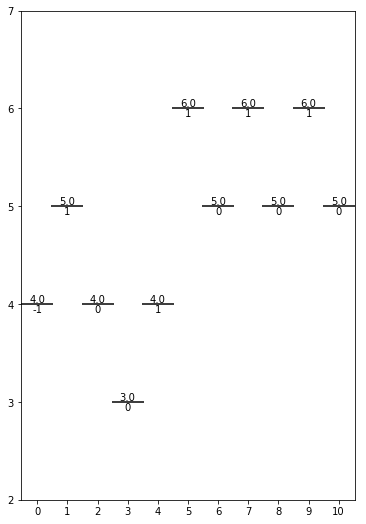

In [379]:
f,axes = plt.subplots(nrows=1, figsize=(6,9))
#a = axes.ravel()
a = axes
nSteps = len(game.wealth_history)
steps = np.array(range(nSteps))
steps = steps + 0.5
x_ticks = [i+0.5 for i in range(nSteps)]
x_ticklabels = list(range(nSteps))
y_ticks = np.array(range(int(np.max(wealth_history))))+2.0
#y_ticklabels = list(range(nSteps))
a.scatter(steps, wealth_history, marker='_', s=1000, c='k')
for coin, step, wealth in zip(coin_history,steps,wealth_history):
    a.annotate(wealth, (step,wealth), horizontalalignment='center', verticalalignment='bottom')
    a.annotate(coin, (step,wealth), horizontalalignment='center', verticalalignment='top')
a.set_xticks(x_ticks)
a.set_xticklabels(x_ticklabels);
a.set_yticks(y_ticks);

#a[1].set_xticks(x_ticks)
#a[1].set_xticklabels(x_ticklabels);
#a[1].bar(steps, coin_history)

In [309]:
game.print_current_state()

-------------------
Current wealth: 3.0
Current pot:    1
Losses so far:  6


In [80]:
game.update_state()

In [81]:
game.print_current_state()

Current wealth: 5
Current pot:    2.0
Losses so far:  0


In [73]:
game.reset()

In [74]:
game.print_current_state()

Current wealth: 4
Current pot:    1
Losses so far:  0


In [12]:
coin_tosses = [coin_toss() for i in range(100)]

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 51.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

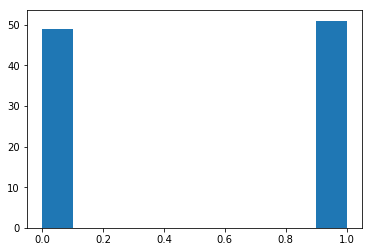

In [13]:
f,a = plt.subplots()
a.hist(coin_tosses)

In [383]:
A = np.array([[0.99, 0.8], [0.01, 0.2]])
A

array([[0.99, 0.8 ],
       [0.01, 0.2 ]])

In [386]:
v = np.array([[1], [0]])
v

array([[1],
       [0]])

In [390]:
np.linalg.matrix_power(A, 1000)

array([[0.98765432, 0.98765432],
       [0.01234568, 0.01234568]])

In [388]:
np.linalg.matrix_power(A**100).dot(v)

array([[3.66032341e-001],
       [1.00000000e-200]])

In [384]:
= np.linalg.eig(A)

(array([1.  , 0.19]), array([[ 0.99992188, -0.70710678],
        [ 0.01249902,  0.70710678]]))